In [1]:
import tensorflow as tf

Segments shape:  (228, 28, 28, 1)


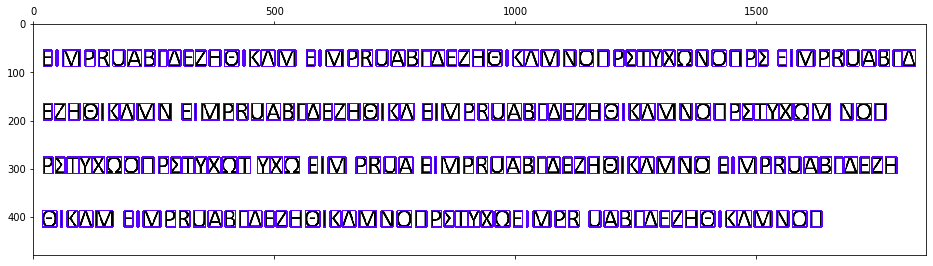

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

np.random.seed(42)


import warnings
warnings.filterwarnings("ignore")


plt.rcParams["figure.figsize"] = (5,5)


#read image
img = cv2.imread('greek_alphabet2.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))


segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if h>= 2 and w>=1:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        #roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

train = np.array(segments)
print('Segments shape: ', train.shape)

plt.matshow(img)

In [3]:
letter_map = dict(zip(list(set('EIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΝΟΠΡΣEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝEIMPRUΑΒΓΔΕΖΗΘΙΚΛEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΜΝΟΠΡΣΤΥΧΩΟΠΡΣΤΥΧΩΤΥΧΩEIMPRUΑEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠ')), range(0,27)))

In [4]:
unique_target = list('EIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΝΟΠΡΣEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝEIMPRUΑΒΓΔΕΖΗΘΙΚΛEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΜΝΟΠΡΣΤΥΧΩΟΠΡΣΤΥΧΩΤΥΧΩEIMPRUΑEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠ')

train_target = []
for i in unique_target:
    train_target.append(letter_map[i])
    
train_target = np.array(train_target)

print('Target shape:', train_target.shape)

Target shape: (228,)


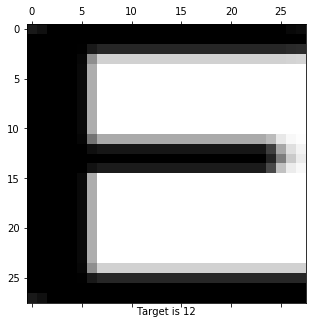

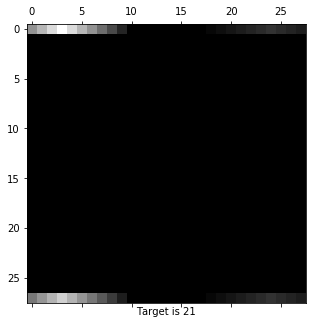

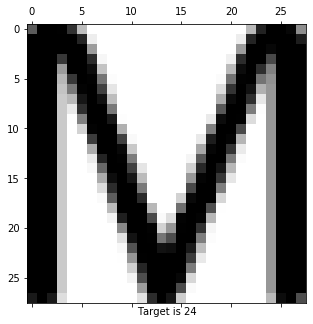

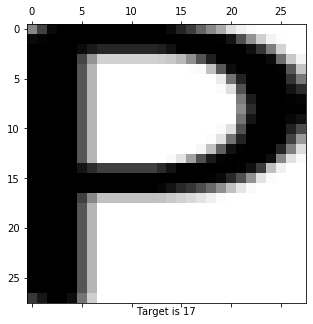

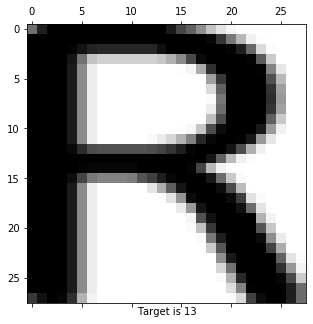

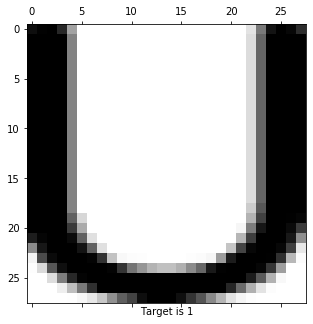

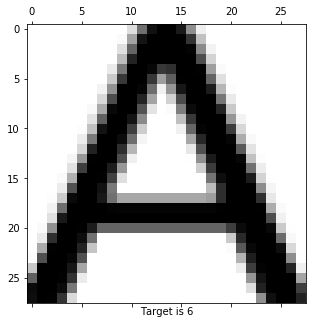

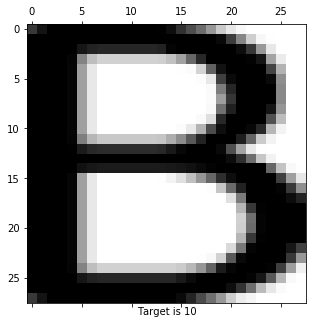

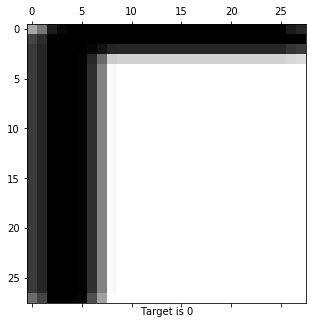

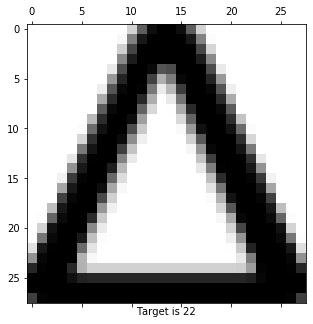

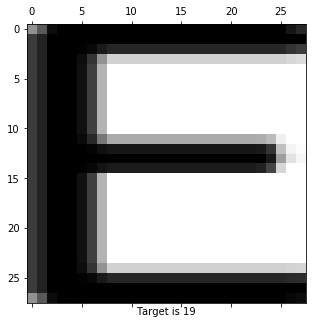

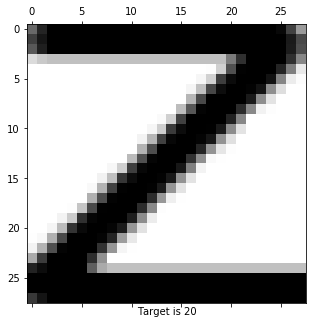

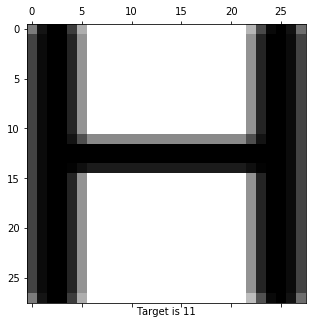

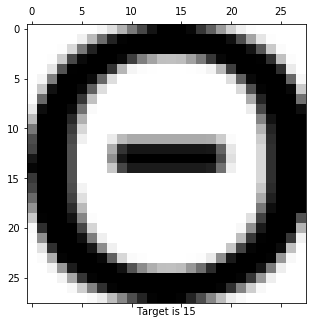

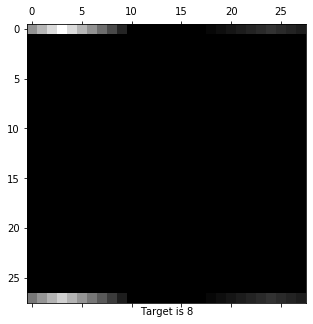

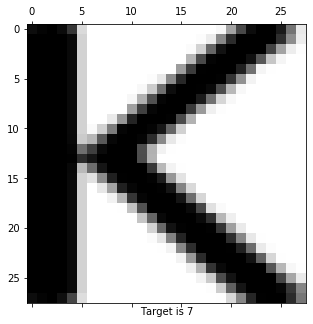

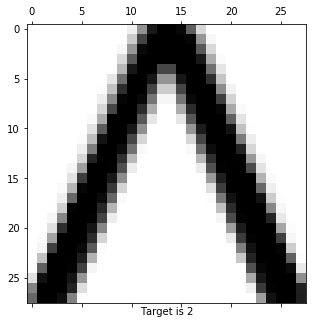

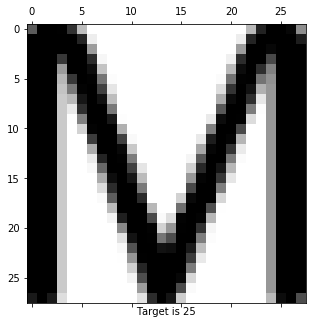

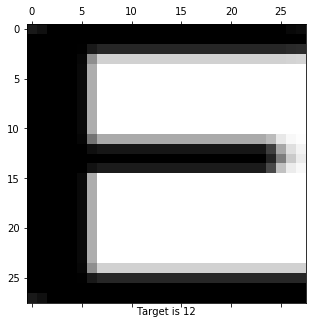

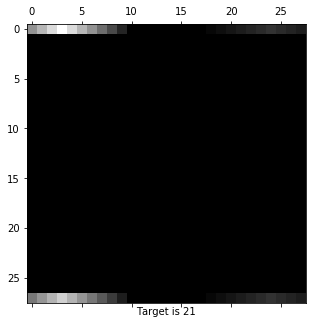

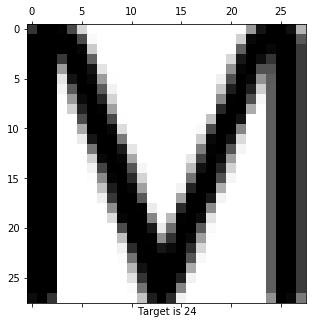

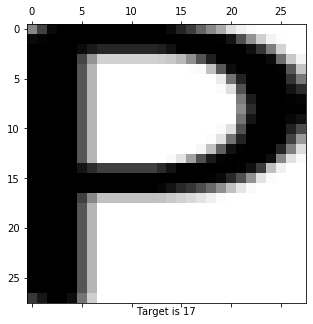

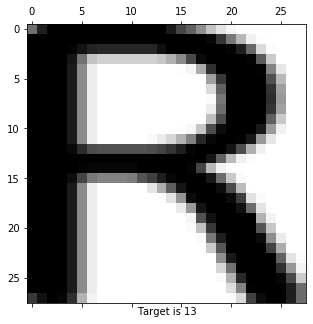

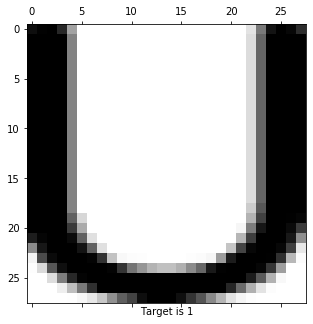

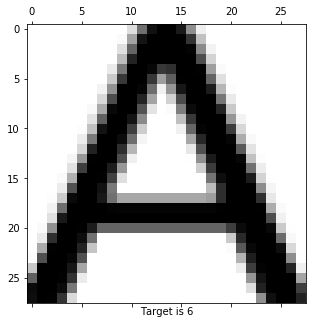

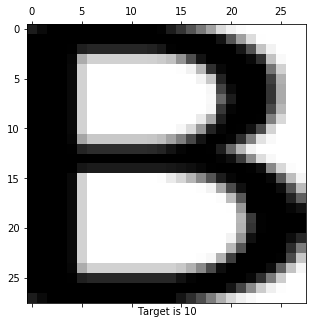

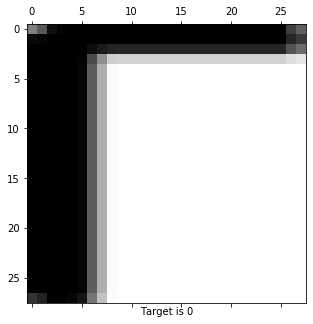

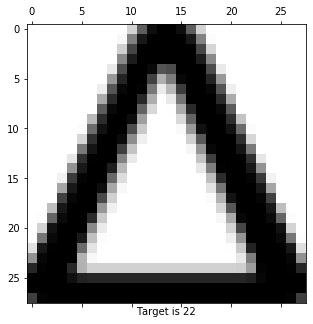

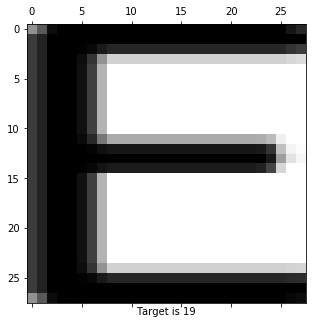

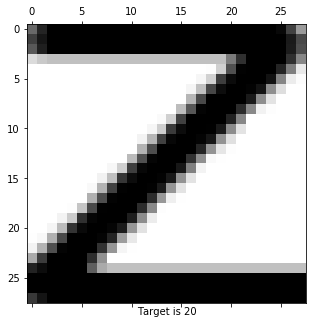

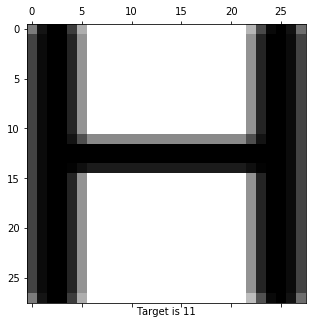

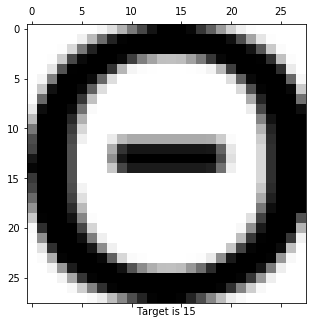

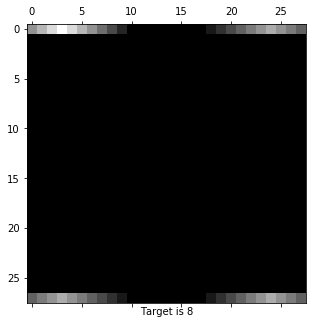

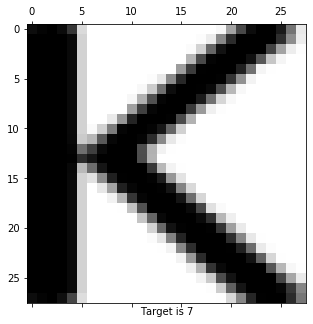

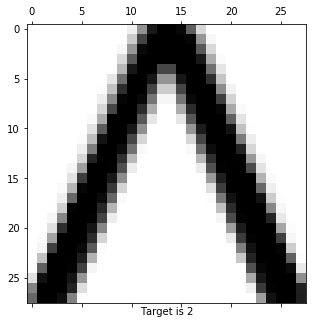

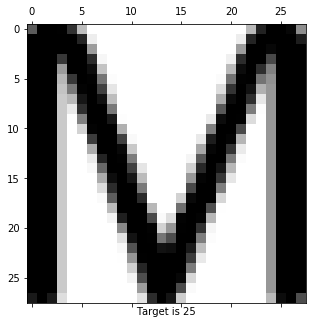

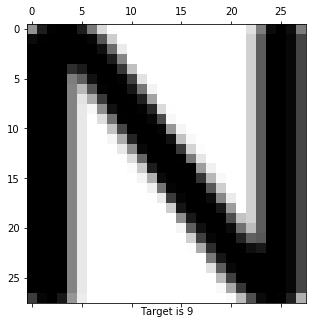

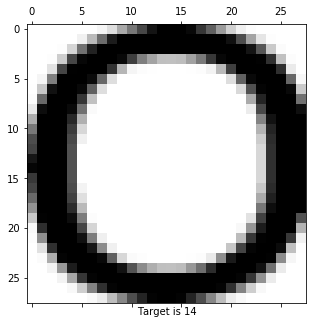

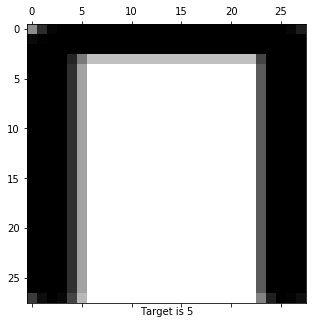

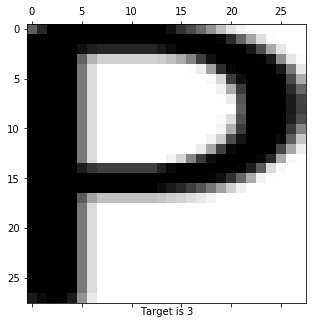

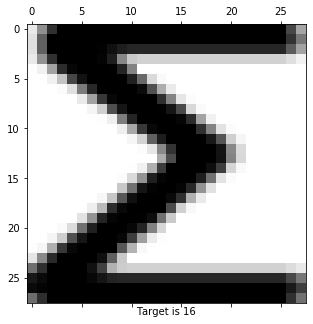

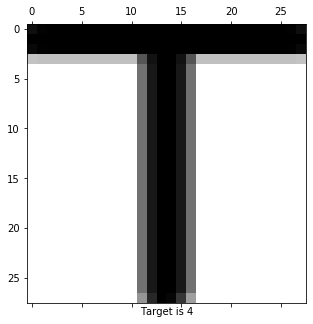

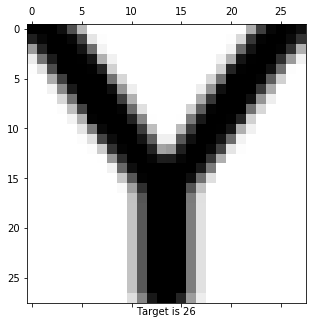

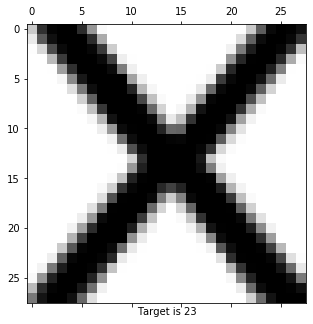

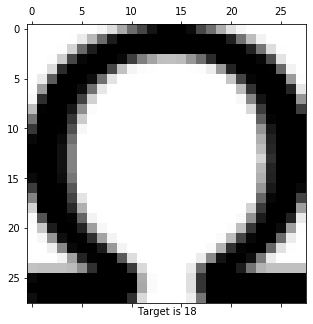

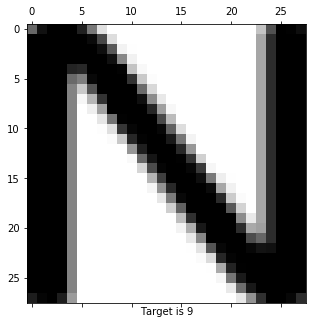

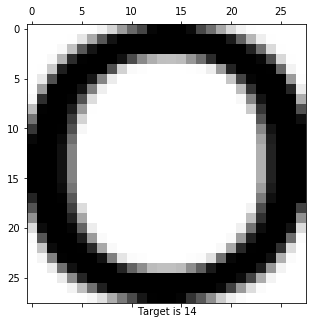

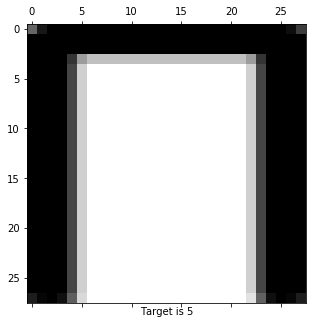

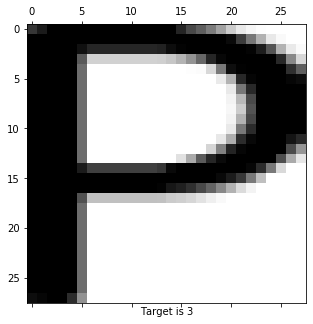

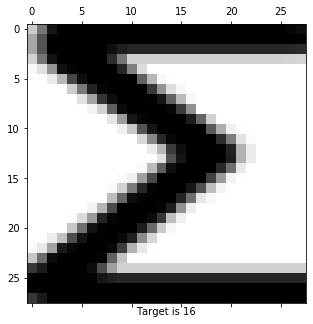

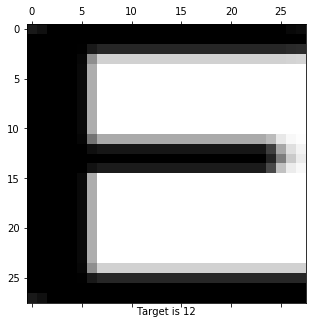

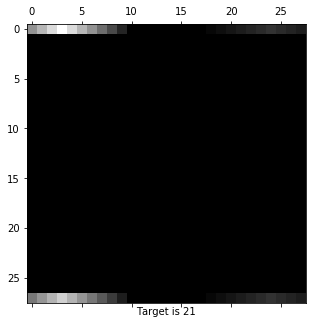

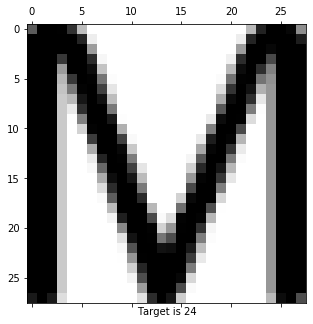

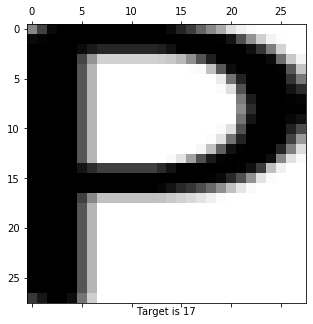

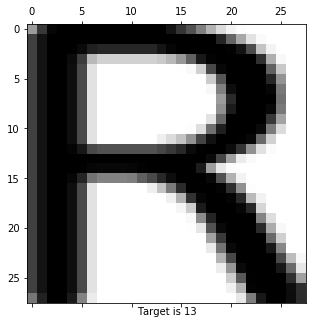

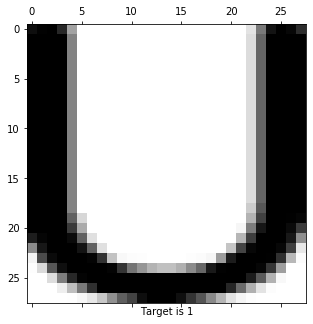

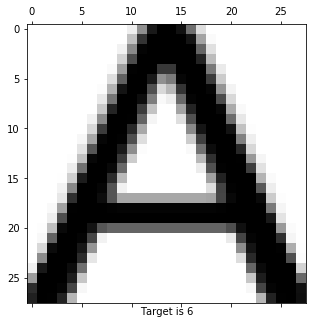

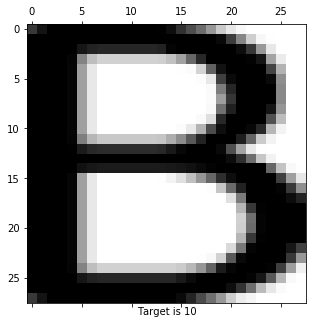

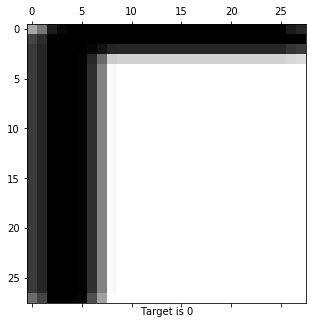

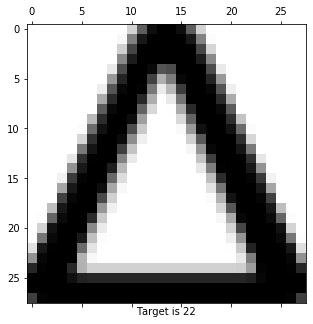

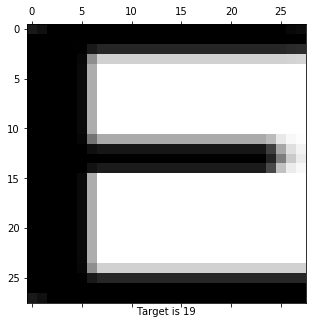

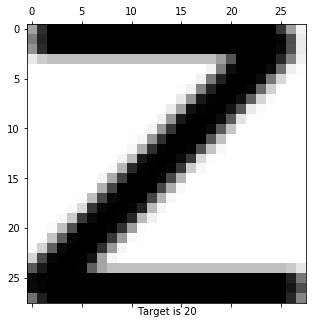

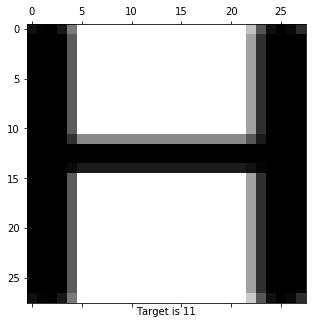

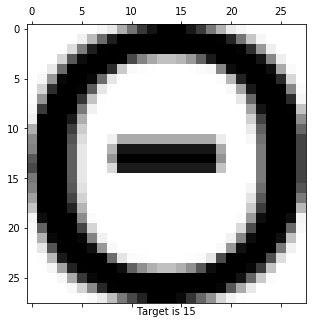

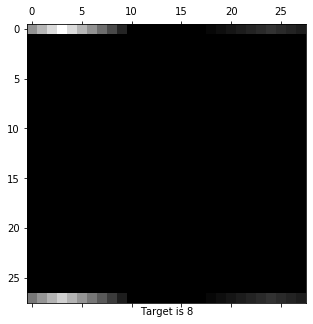

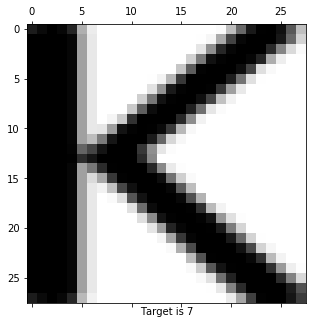

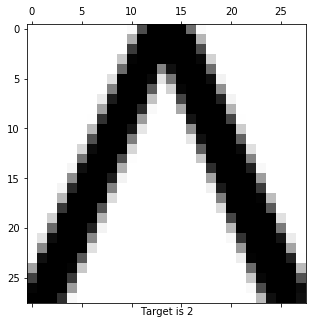

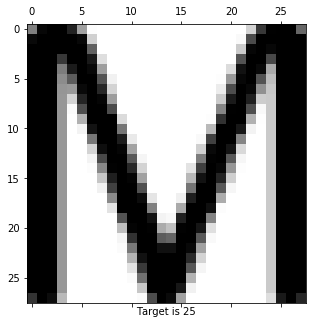

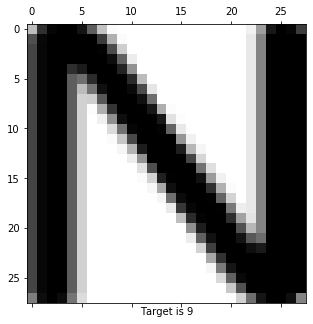

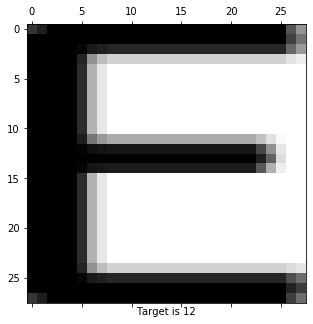

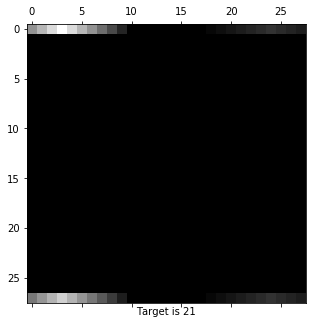

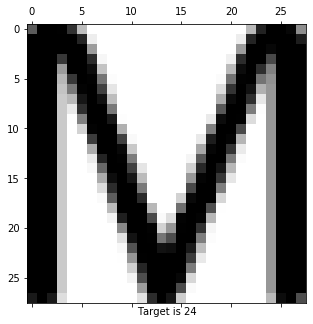

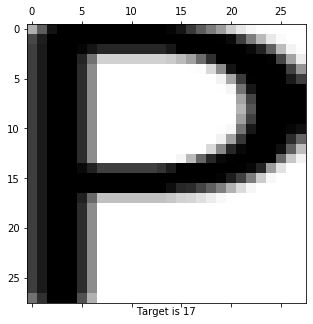

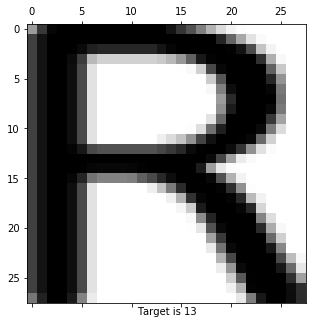

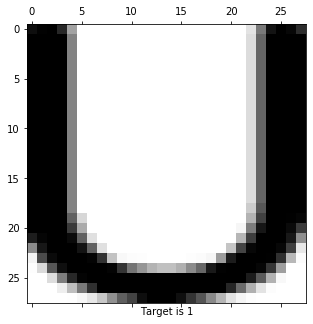

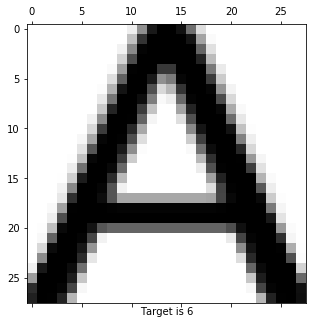

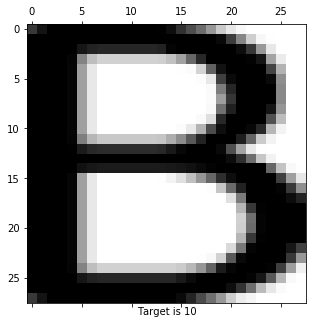

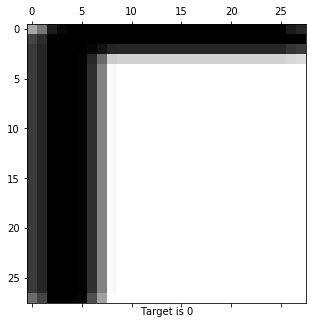

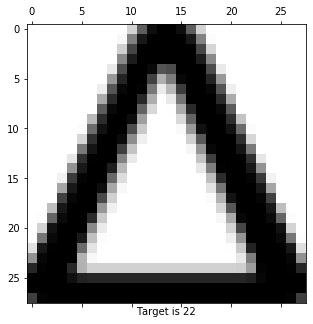

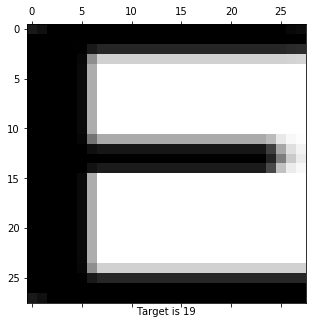

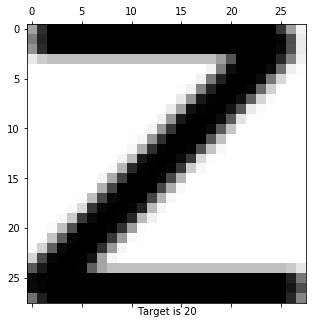

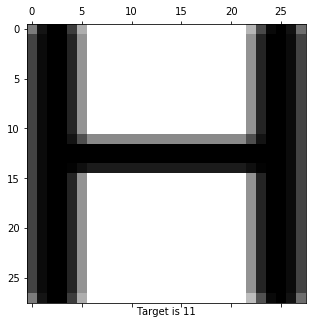

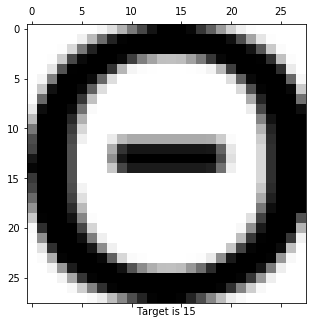

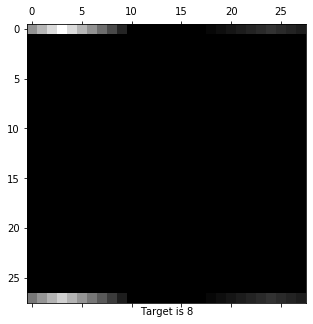

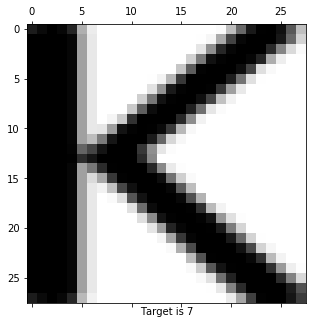

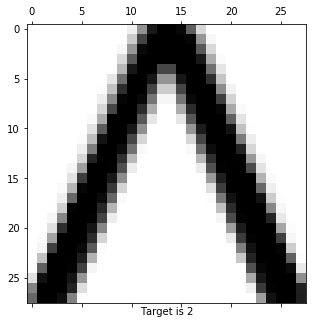

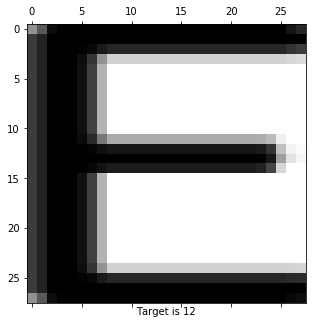

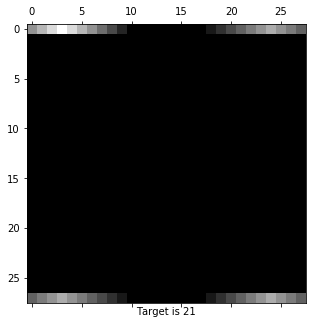

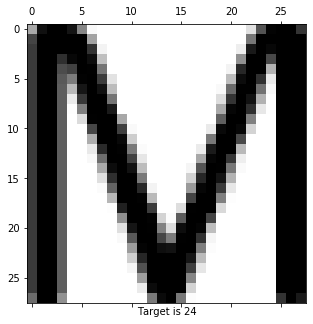

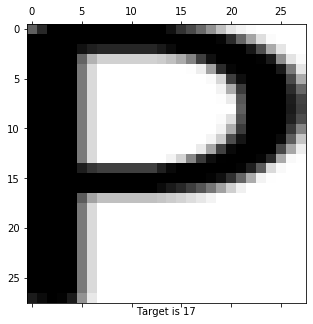

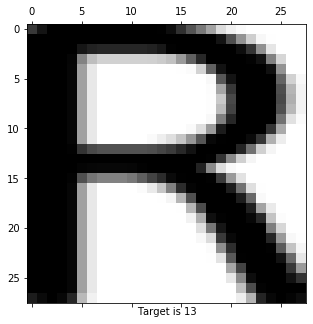

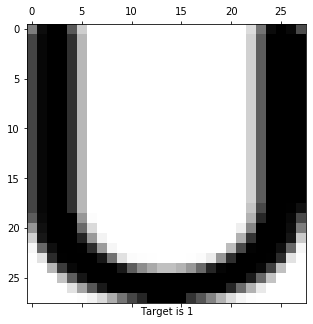

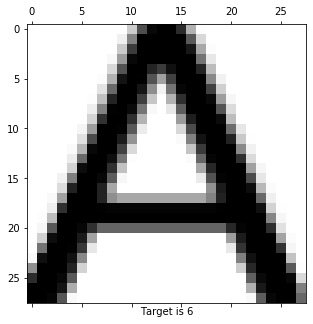

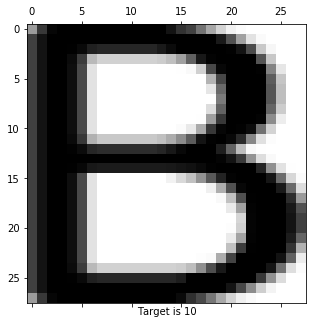

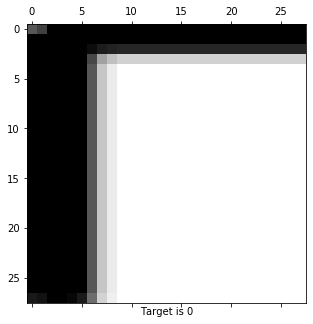

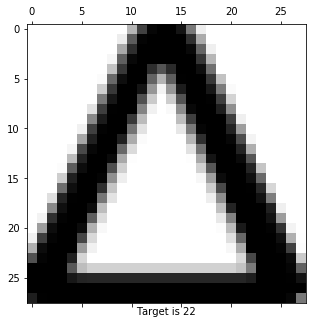

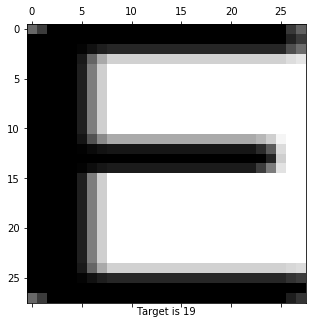

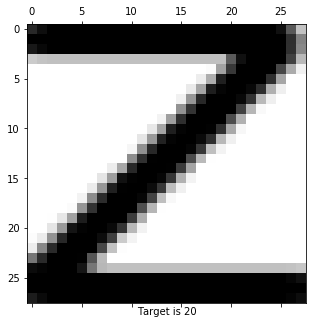

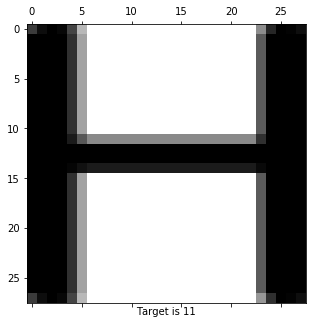

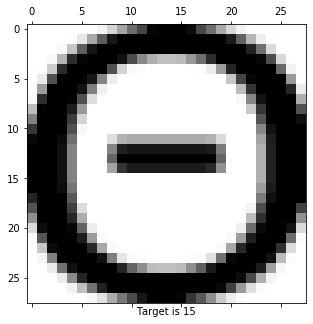

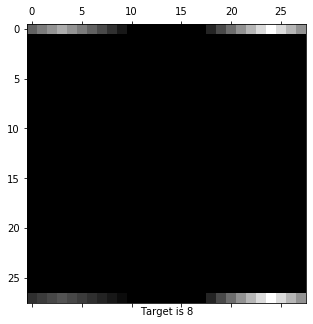

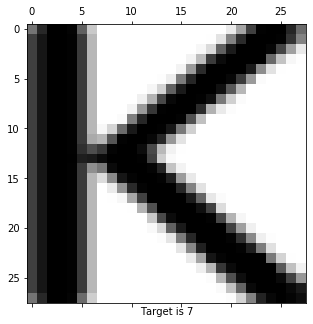

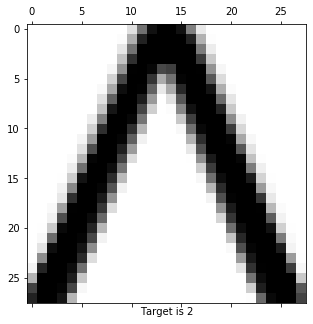

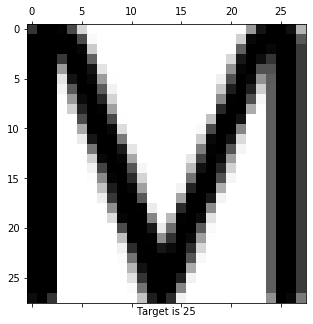

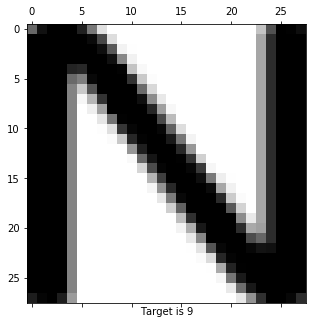

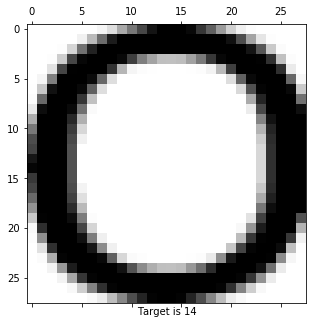

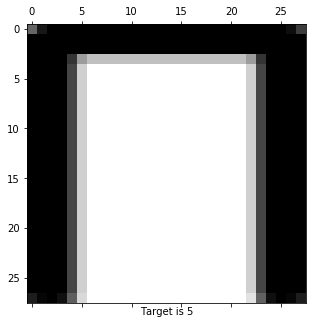

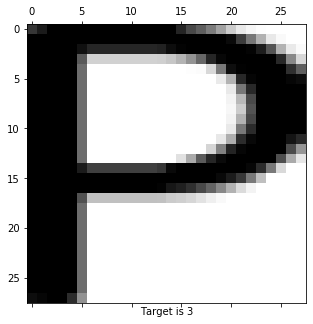

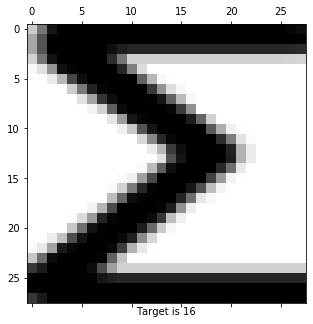

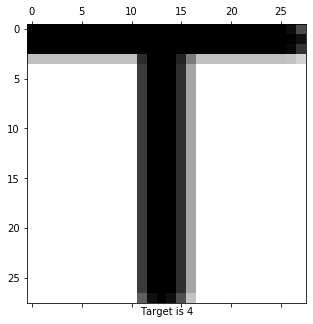

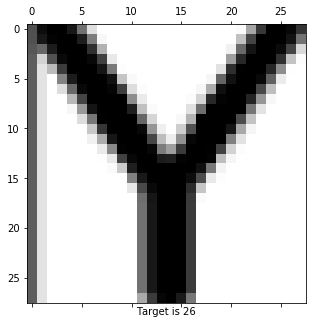

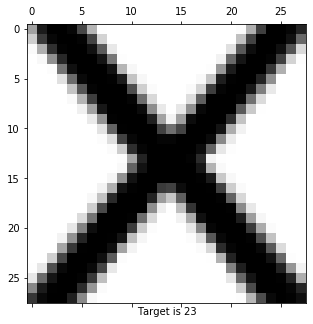

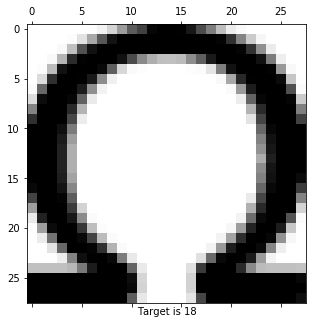

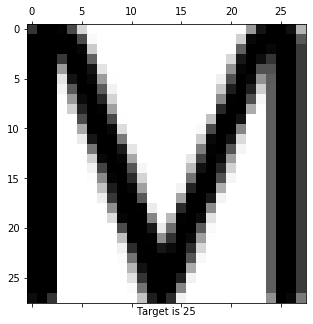

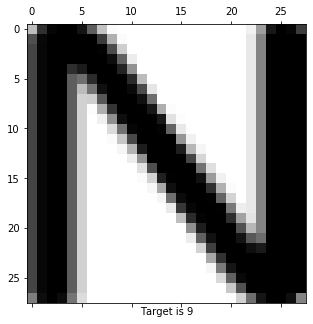

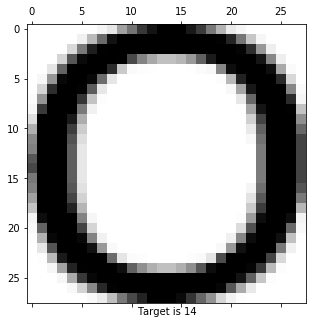

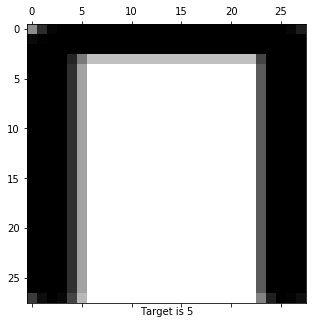

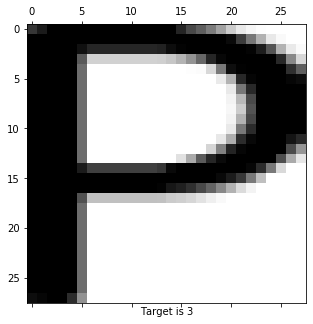

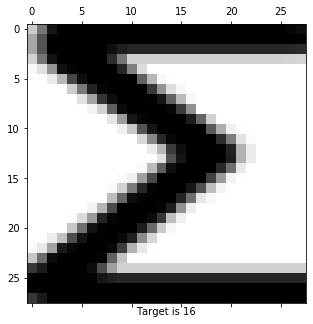

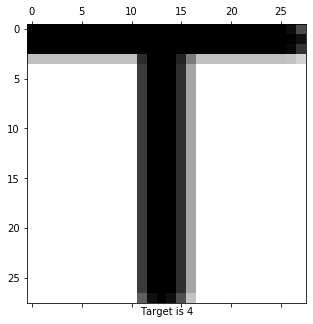

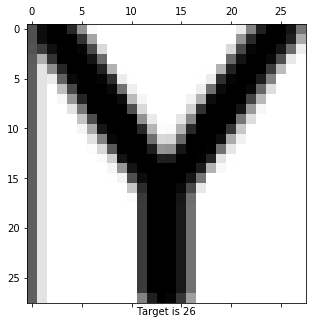

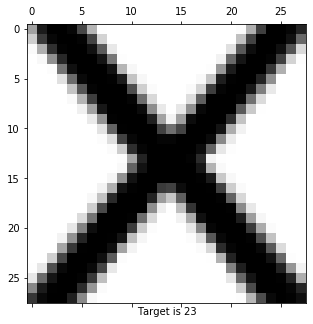

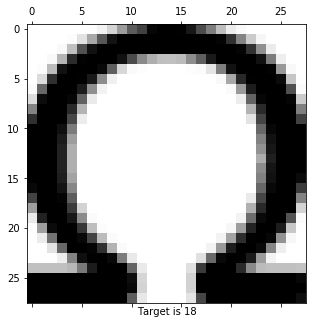

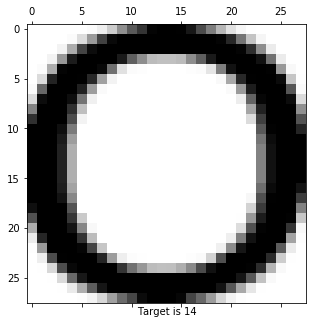

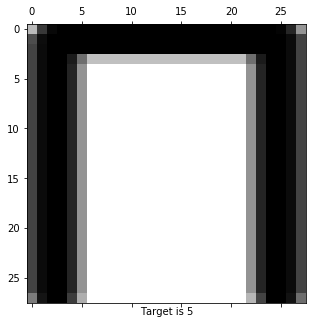

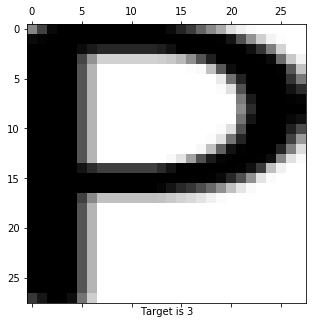

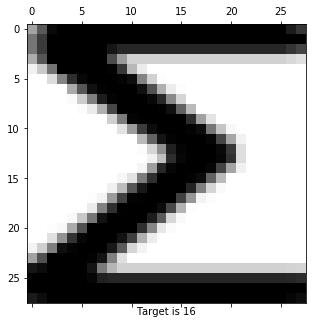

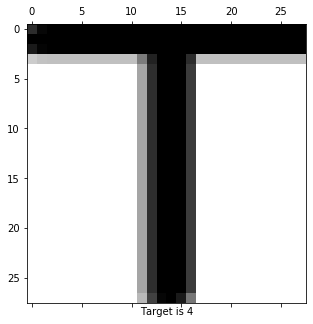

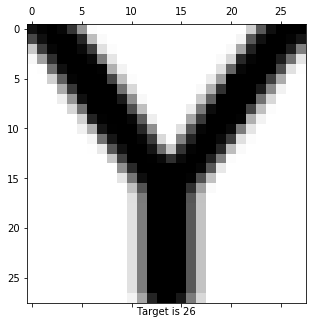

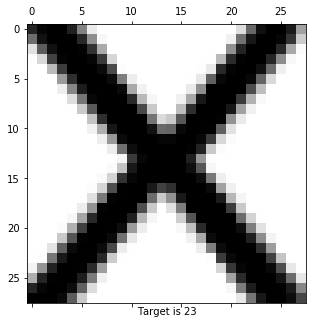

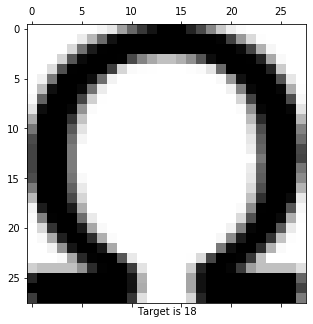

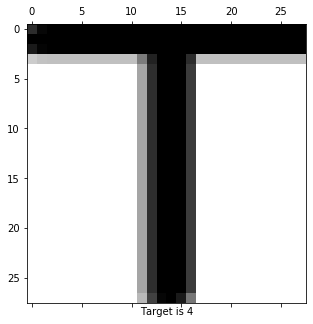

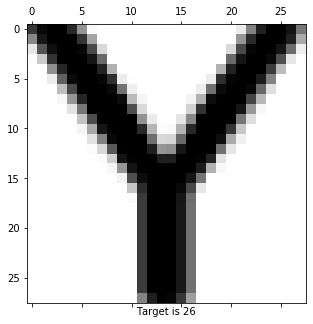

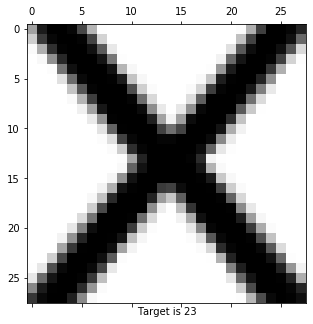

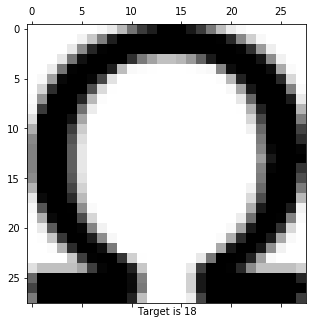

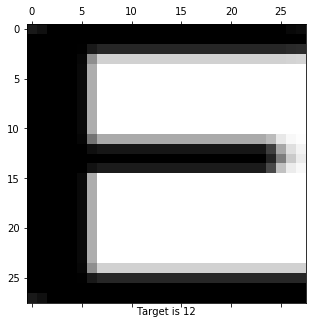

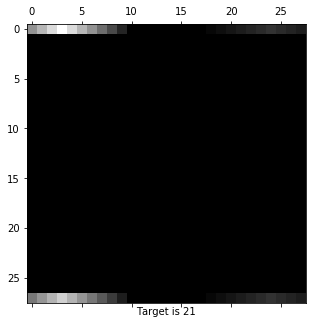

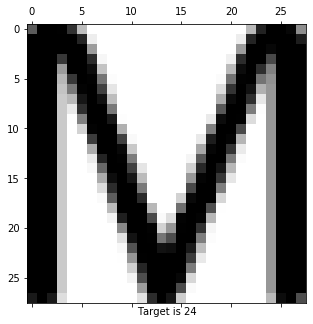

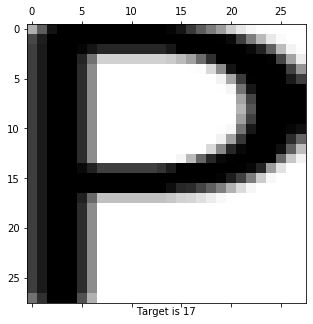

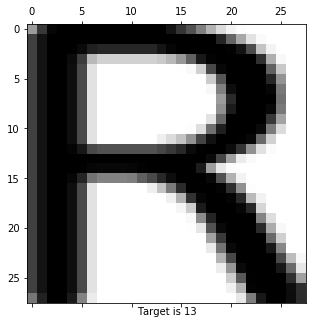

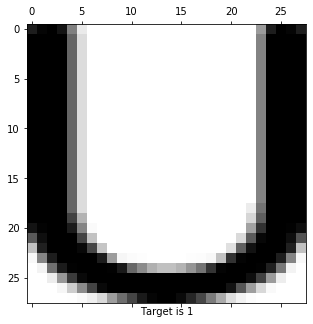

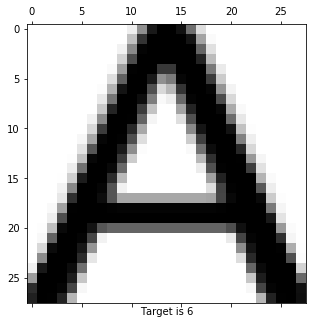

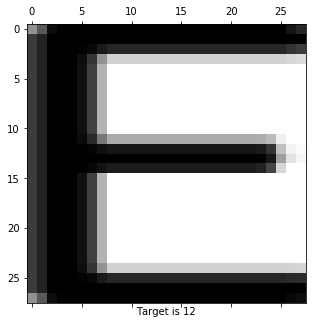

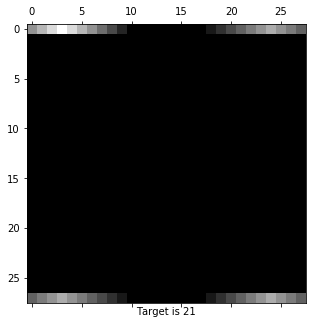

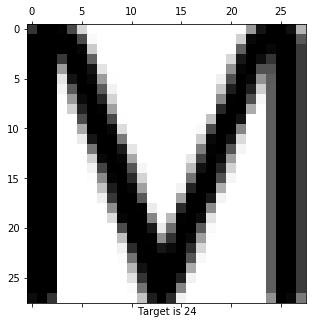

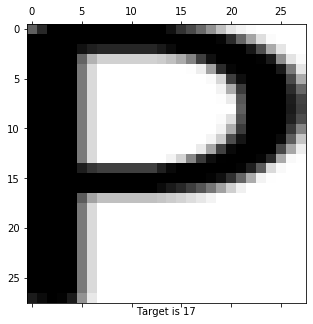

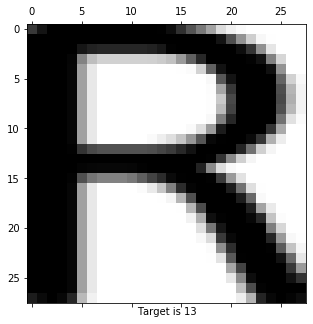

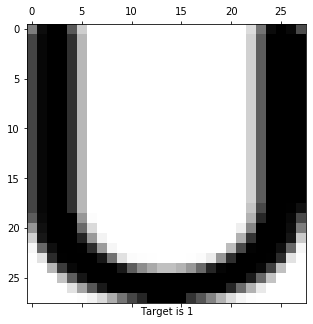

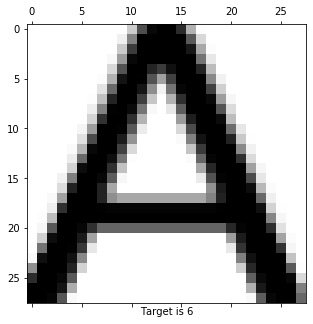

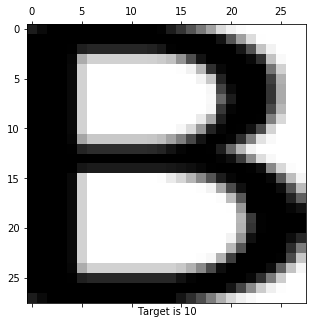

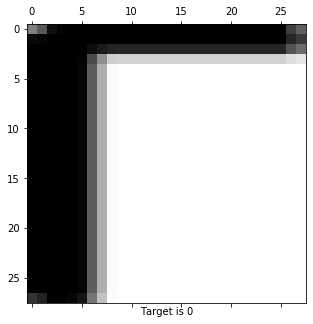

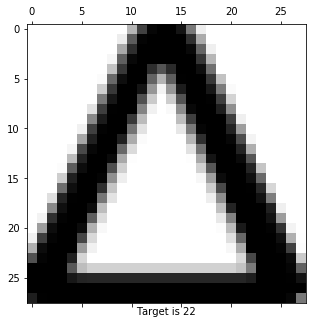

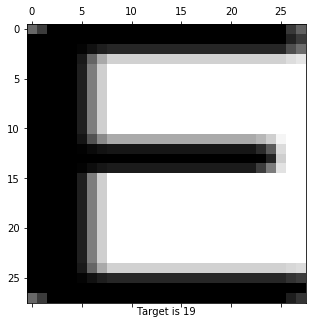

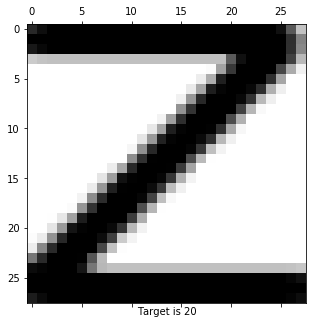

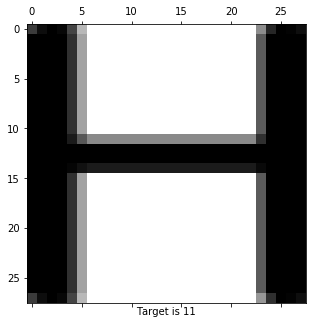

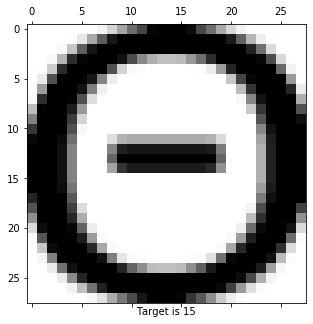

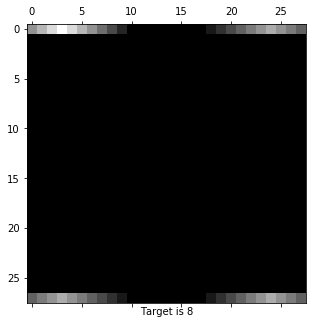

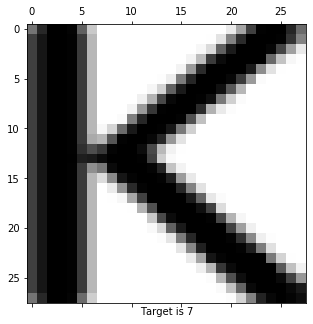

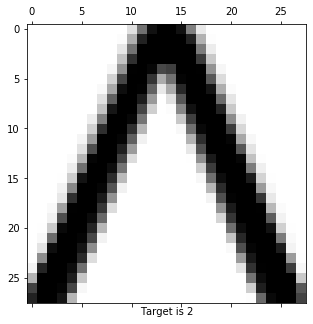

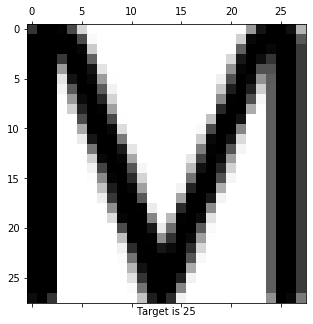

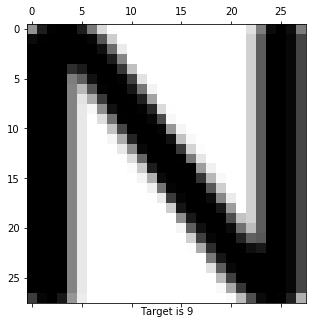

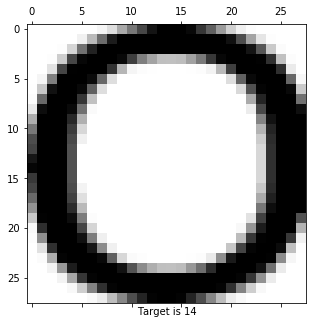

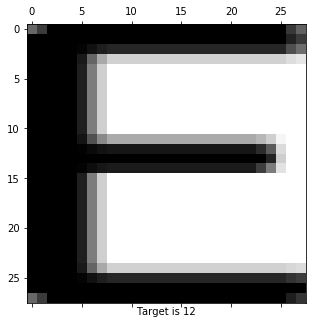

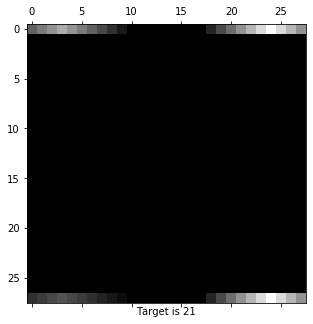

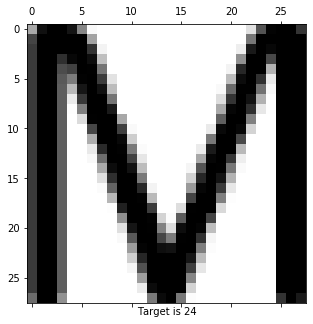

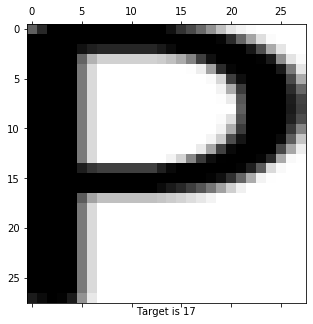

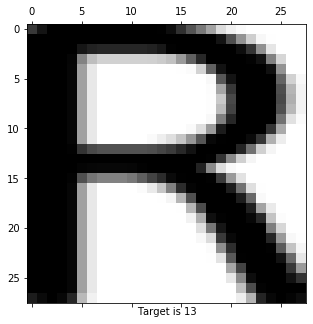

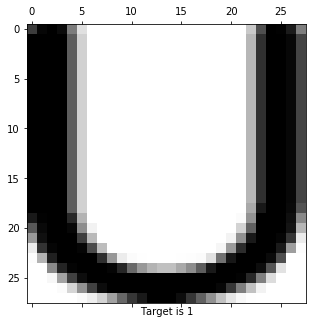

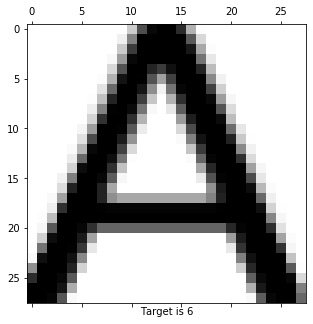

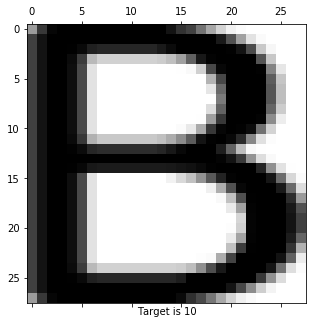

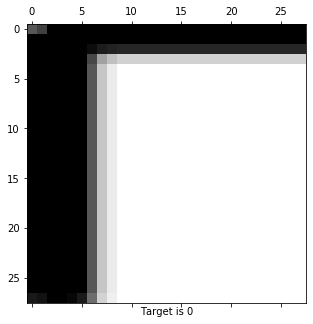

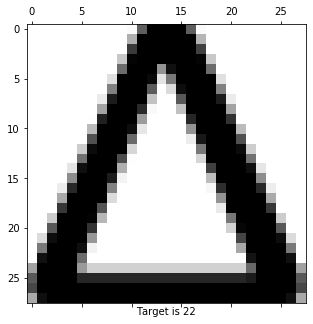

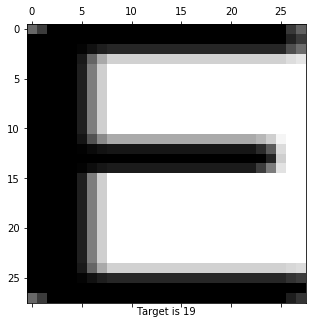

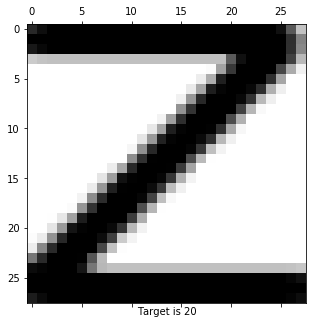

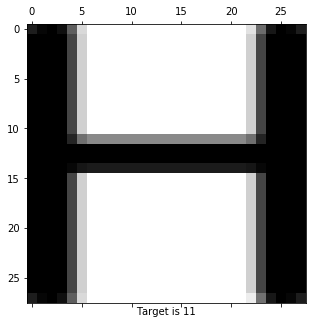

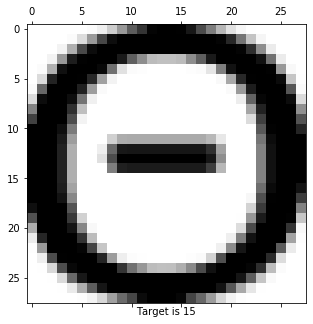

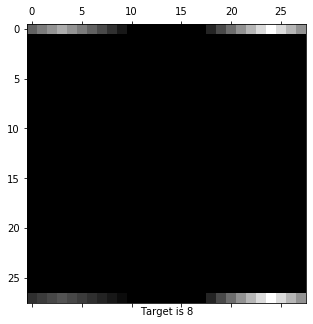

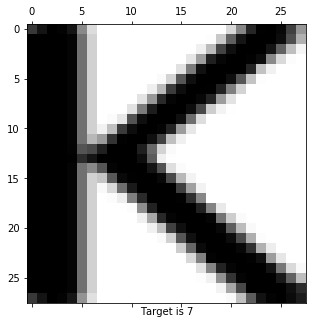

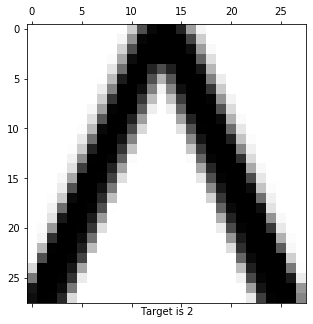

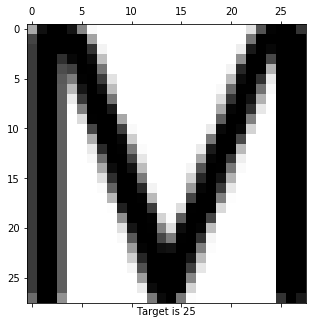

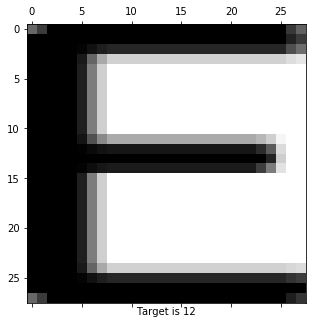

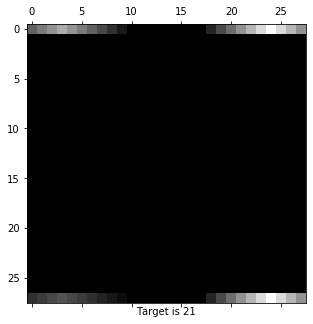

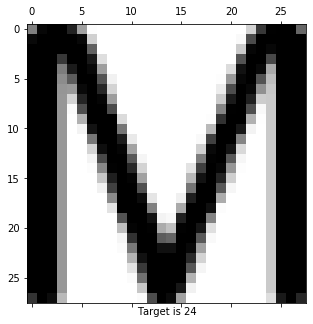

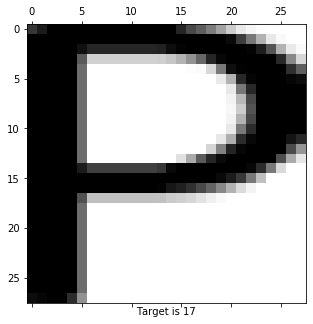

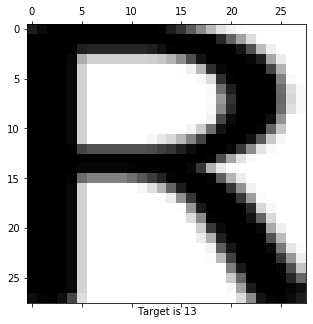

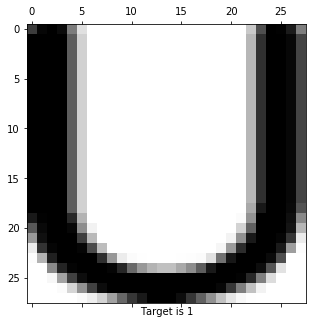

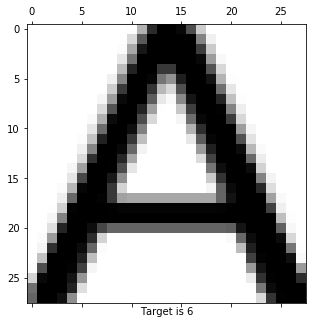

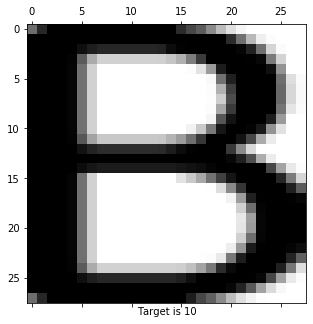

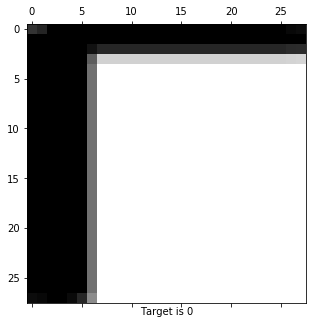

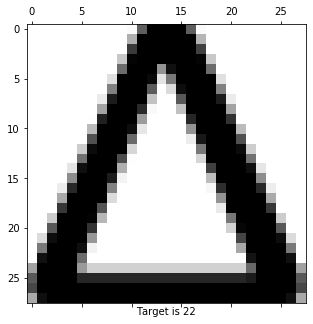

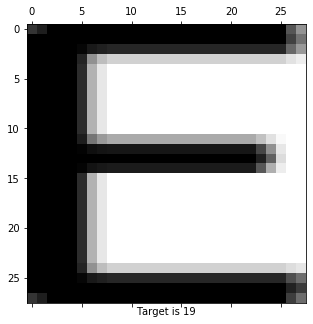

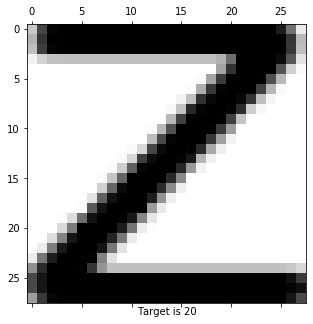

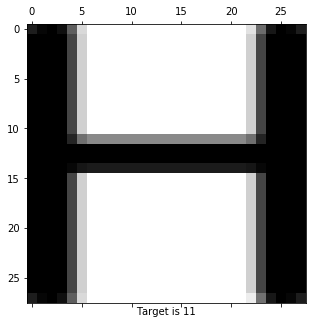

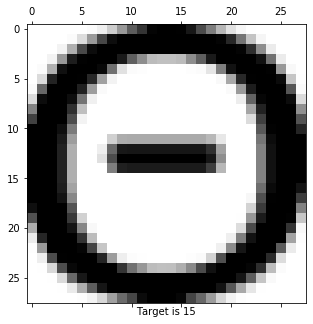

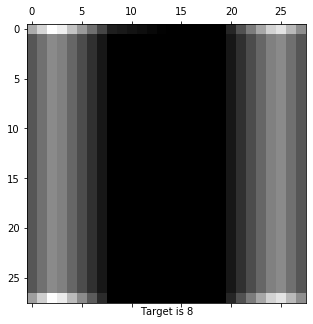

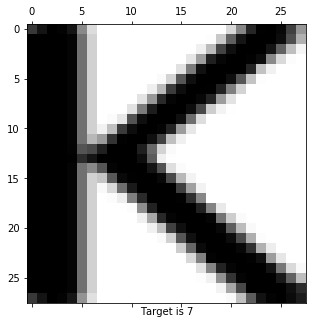

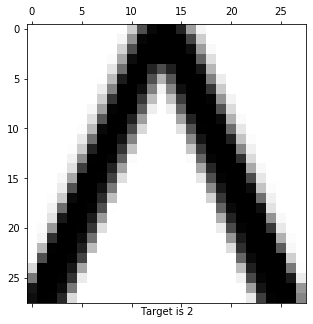

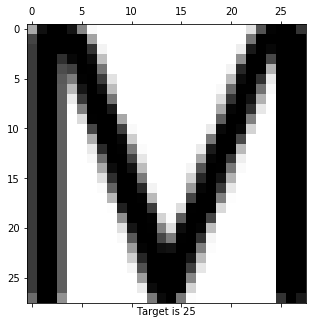

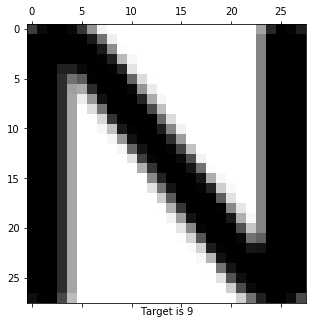

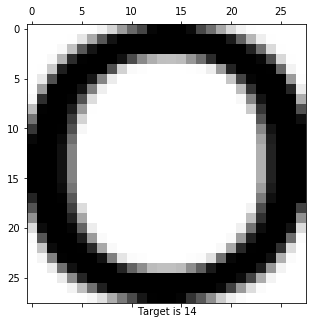

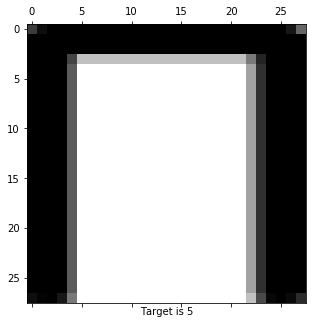

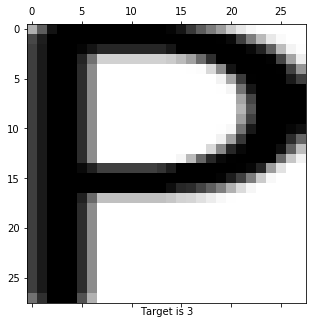

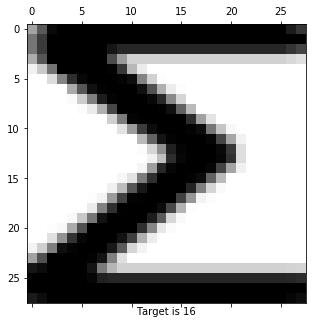

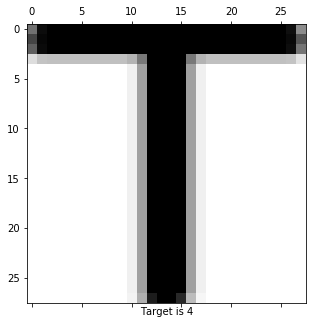

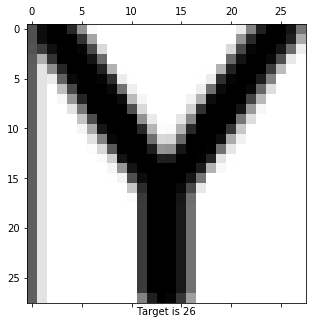

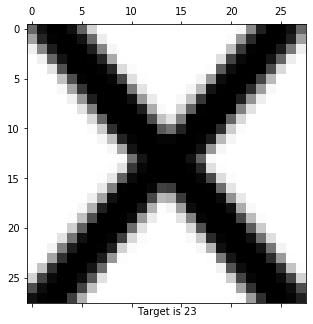

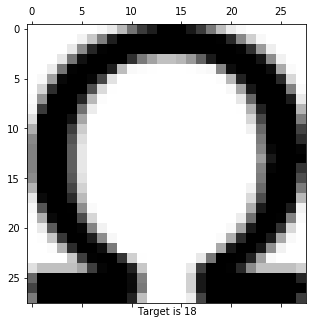

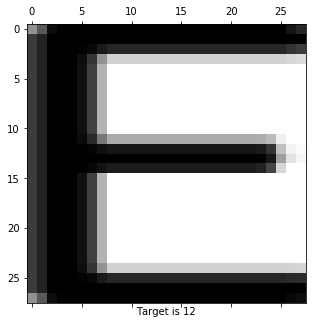

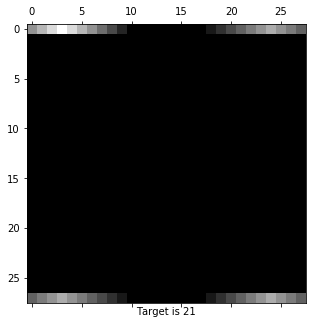

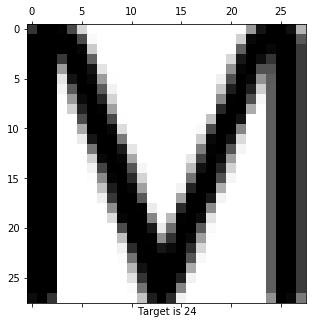

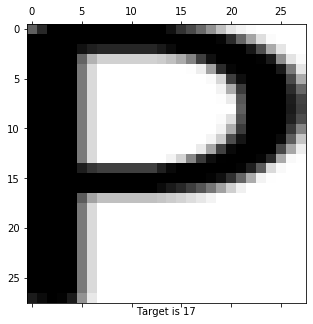

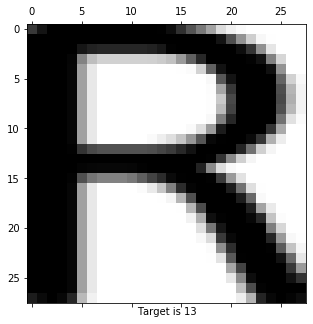

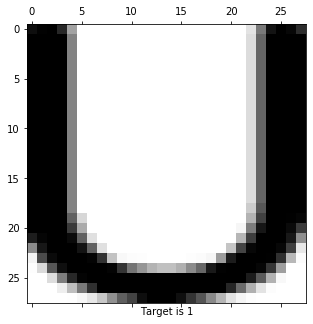

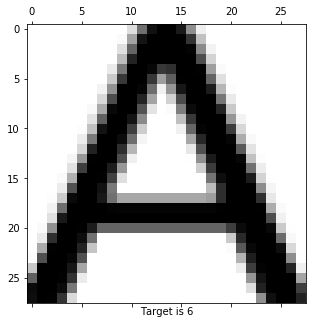

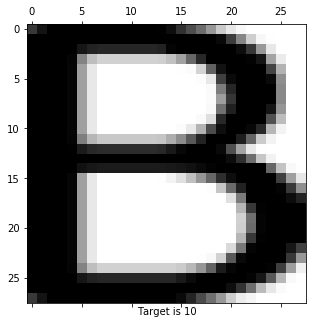

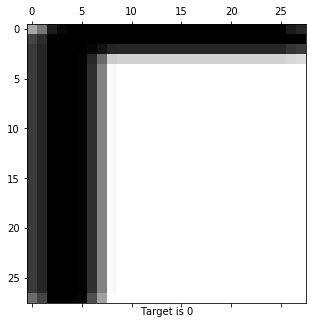

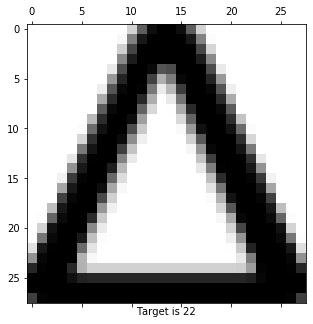

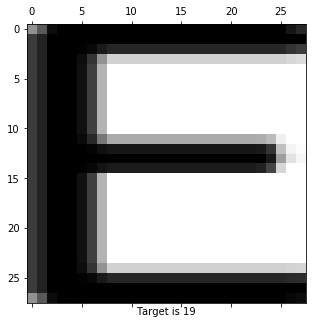

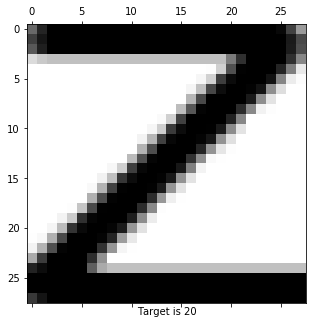

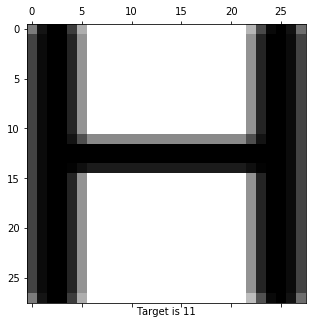

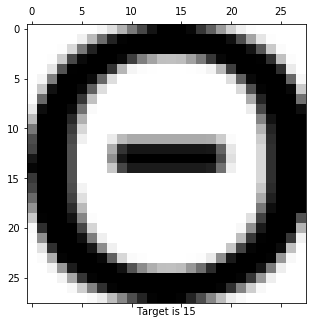

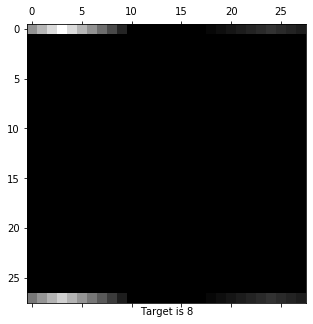

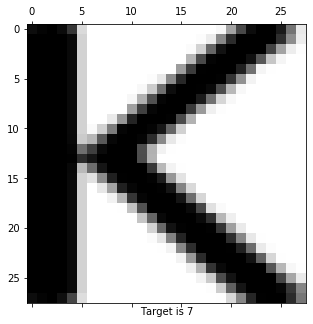

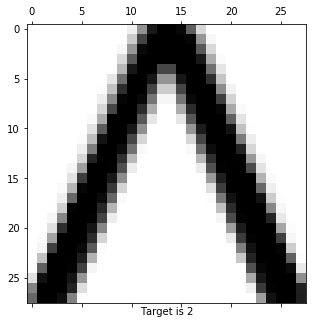

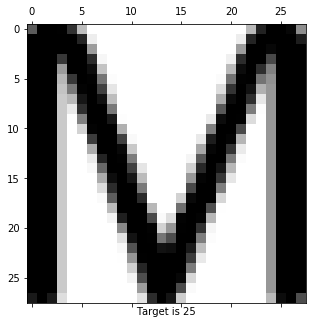

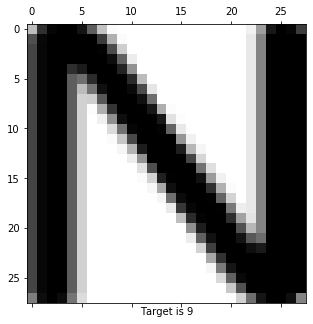

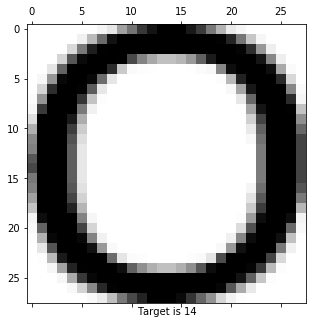

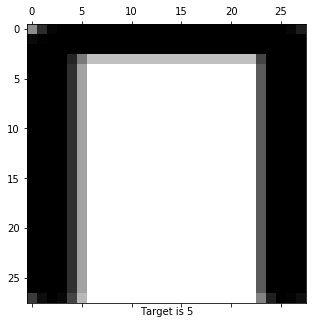

In [5]:
for i in range(0, train.reshape(228,28,28).shape[0]):
    plt.matshow(train.reshape(228,28,28)[i], cmap = 'gray')
    plt.xlabel('Target is ' + str(train_target[i]))

Segments shape:  (582, 28, 28, 1)


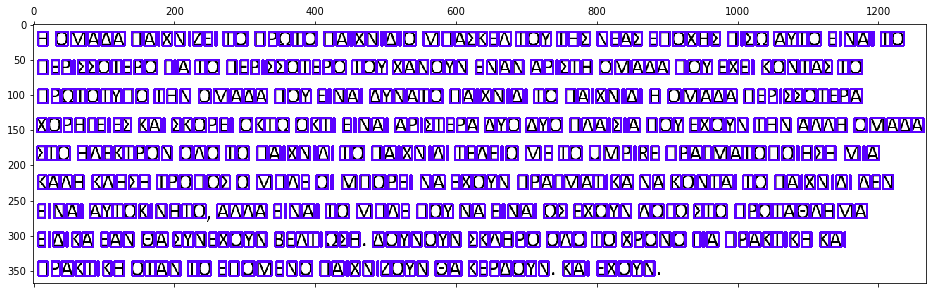

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

#read image
img = cv2.imread('writing_extract_greek.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))

segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if area>= 12:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        #roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

test = np.array(segments)
print('Segments shape: ', test.shape)

plt.matshow(img)

In [31]:
plt.rcParams["figure.figsize"] = (5,5)

In [32]:
unique_target = list('ΗΟΜΑΔΑΠΑΙΧΝΙΖΕΙΤΟΠΡΩΤΟΠΑΙΧΝΙΔΙΟΜΠΑΣΚΕΛΤΟΥΤΗΣΝΕΑΣΕΠΟΧΗΣΠΙΣΩΑΥΤΟΕΙΝΑΙΤΟΠΕΡΙΣΣΟΤΕΡΟΓΙΑΤΟΠΕΡΙΣΣΟΤΕΡΟΤΟΥΧΑΝΟΥΝΕΝΑΝΑΡΙΣΤΗΟΜΑΔΑΠΟΥΕΧΕΙΚΟΝΤΑΣΤΟΠΡΩΤΟΤΥΠΟΤΗΝΟΜΑΔΑΠΟΥΕΙΝΑΙΔΥΝΑΤΟΠΑΙΧΝΙΔΙΤΟΠΑΙΧΝΙΔΙΗΟΜΑΔΑΠΕΡΙΣΣΟΤΕΡΑΧΟΡΗΓΕΙΕΣΚΑΙΣΚΟΡΕΙΟΚΤΩΟΚΤΙΕΙΝΑΙΑΡΙΣΤΕΡΑΔΥΟΔΥΟΠΛΑΙΣΙΑΠΟΥΕΧΟΥΝΤΗΝΑΛΛΗΟΜΑΔΑΣΤΟΗΛΕΚΤΡΟΝΟΛΟΤΟΠΑΙΧΝΙΔΙΤΟΠΑΙΧΝΙΔΙΤΕΛΕΙΟΜΕΤΟUMPIREΠΡΑΓΜΑΤΟΠΟΙΗΣΗΜΙΑΚΑΛΗΚΛΗΣΗΤΡΟΠΟΣΟΜΠΛΕΟΙΜΠΟΡΕΙΝΑΕΧΟΥΝΠΡΑΓΜΑΤΙΚΑΝΑΚΟΝΤΑΙΤΟΠΑΙΧΝΙΔΙΔΕΝΕΙΝΑΙΑΥΤΟΚΙΝΗΤΟΑΛΛΑΕΙΝΑΙΤΟΜΠΛΕΠΟΥΝΑΕΙΝΑΙΩΣΕΧΟΥΝΛΟΓΩΣΤΟΠΡΩΤΑΘΛΗΜΑΕΙΔΙΚΑΕΑΝΘΑΣΥΝΕΧΟΥΝΒΕΛΤΙΩΣΗΔΟΥΝΟΥΝΣΚΛΗΡΟΟΛΟΤΟΧΡΟΝΟΓΙΑΠΡΑΚΤΙΚΗΚΑΙΠΡΑΚΤΙΚΗΟΤΑΝΤΟΕΠΟΜΕΝΟΠΑΙΧΝΙΖΟΥΝΘΑΚΕΡΔΟΥΝΚΑΙΕΧΟΥΝ')

test_target = []
for i in unique_target:
    test_target.append(letter_map[i])
    
test_target = np.array(test_target)

In [33]:
n_samples = len(test)

In [34]:
X_train = train
y_train = train_target
X_val = test[:round(.8 * n_samples)]
y_val = test_target[:round(.8 * n_samples)]
X_test = test[round(.8 * n_samples):]
y_test = test_target[round(.8 * n_samples):]

In [35]:
X_test.shape

(116, 28, 28, 1)

In [36]:
y_test.shape

(116,)

In [37]:
X_train[0].shape

(28, 28, 1)

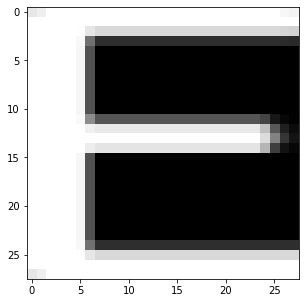

In [38]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :, 0],cmap=plt.cm.binary)
plt.show()

In [39]:
print(list(letter_map.keys())[list(letter_map.values()).index(train_target[0])])

E


In [40]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

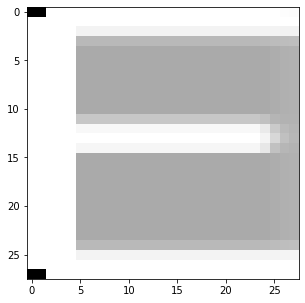

In [41]:
plt.imshow(X_train[0, :, :, 0],cmap=plt.cm.binary)
plt.show()

In [42]:
epochs = 20
learning_rate = 0.001

In [43]:
from tensorflow.keras.optimizers import Adam

In [44]:
adam = Adam(lr=learning_rate)

In [45]:
model = tf.keras.models.Sequential()

In [46]:
# model.add(tf.keras.layers.Conv2D(128, (3, 3), input_shape=X_train.shape[1:], activation=tf.nn.relu))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [47]:
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [48]:
model.add(tf.keras.layers.Flatten())

In [49]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [50]:
logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))

In [51]:
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model_fit = model.fit(X_train, y_train, epochs=epochs, batch_size = 10, validation_data=(X_val, y_val))

Train on 228 samples, validate on 466 samples
Epoch 1/20
228/228 [==============================] - 2s 9ms/sample - loss: 2.9997 - acc: 0.1798 - val_loss: 2.6204 - val_acc: 0.1996
Epoch 2/20
228/228 [==============================] - 2s 7ms/sample - loss: 1.4327 - acc: 0.6447 - val_loss: 0.9061 - val_acc: 0.7403
Epoch 3/20
228/228 [==============================] - 2s 9ms/sample - loss: 0.5984 - acc: 0.7851 - val_loss: 0.7470 - val_acc: 0.7597
Epoch 4/20
228/228 [==============================] - 2s 8ms/sample - loss: 0.4095 - acc: 0.8509 - val_loss: 0.5848 - val_acc: 0.8884
Epoch 5/20
228/228 [==============================] - 2s 8ms/sample - loss: 0.4814 - acc: 0.8246 - val_loss: 0.4728 - val_acc: 0.8498
Epoch 6/20
228/228 [==============================] - 2s 8ms/sample - loss: 0.3468 - acc: 0.8684 - val_loss: 0.2972 - val_acc: 0.9206
Epoch 7/20
228/228 [==============================] - 2s 8ms/sample - loss: 0.3832 - acc: 0.8289 - val_loss: 0.5359 - val_acc: 0.7339
Epoch 8/20
228/2

In [53]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Loss: ' + str(val_loss))
print('Accuracy: ' + str(val_acc))

466/466 [==============================] - 0s 654us/sample - loss: 0.2076 - acc: 0.9571
Loss: 0.20760648777556523
Accuracy: 0.95708156


In [54]:
from sklearn.metrics import confusion_matrix
y_val_pred = model.predict_classes(X_val)
c_matrix = confusion_matrix(y_val, y_val_pred)

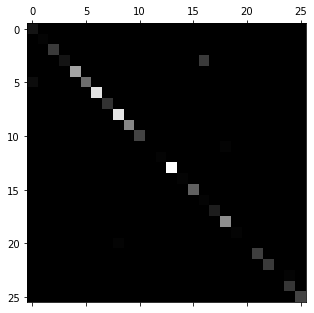

In [55]:
plt.matshow(c_matrix, cmap=plt.cm.gray)
plt.show()

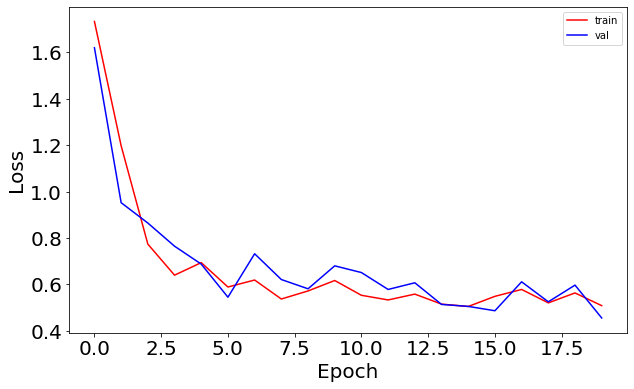

In [56]:
# plot loss
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_fit.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_fit.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

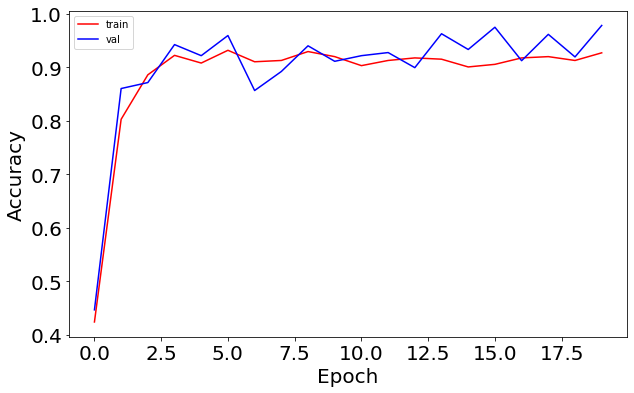

In [57]:
# Plot accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_fit.history['acc']), 'r', label='train')
ax.plot(np.sqrt(model_fit.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [58]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

In [59]:
# solution
epochs = 20
learning_rate = 0.1 # initial learning rate
decay_rate = learning_rate / epochs

# define the optimizer function
sgd = SGD(lr=learning_rate, nesterov=False)

input_dim = X_train.shape[1]
num_classes = 10
batch_size = 20

# build the model
lr_model = tf.keras.models.Sequential()

lr_model.add(tf.keras.layers.Conv2D(128, (3, 3), input_shape=X_train.shape[1:], activation=tf.nn.relu))
lr_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

lr_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu))
lr_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

lr_model.add(tf.keras.layers.Flatten())

lr_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

lr_model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))


#compile
lr_model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# define the learning rate change 
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate
    
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

# you invoke the LearningRateScheduler during the .fit() phase
lr_model_model_hist = lr_model.fit(X_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks_list,
                                    verbose=1,
                                    validation_data=(X_test, y_test))

Train on 228 samples, validate on 116 samples
Epoch 1/20
228/228 [==============================] - 2s 7ms/sample - loss: 3.2959 - acc: 0.0439 - val_loss: 3.2986 - val_acc: 0.0000e+00
Epoch 2/20
228/228 [==============================] - 1s 6ms/sample - loss: 3.2872 - acc: 0.0614 - val_loss: 3.2971 - val_acc: 0.0000e+00
Epoch 3/20
228/228 [==============================] - 1s 6ms/sample - loss: 3.2756 - acc: 0.0439 - val_loss: 3.2928 - val_acc: 0.0086
Epoch 4/20
228/228 [==============================] - 1s 6ms/sample - loss: 3.2613 - acc: 0.0526 - val_loss: 3.2751 - val_acc: 0.0345
Epoch 5/20
228/228 [==============================] - 1s 6ms/sample - loss: 3.2377 - acc: 0.1535 - val_loss: 3.2590 - val_acc: 0.0345
Epoch 6/20
228/228 [==============================] - 1s 6ms/sample - loss: 3.1883 - acc: 0.1711 - val_loss: 3.2299 - val_acc: 0.0345
Epoch 7/20
228/228 [==============================] - 1s 6ms/sample - loss: 3.1072 - acc: 0.1930 - val_loss: 3.1648 - val_acc: 0.0086
Epoch 8/

## Loss and accuracy curves

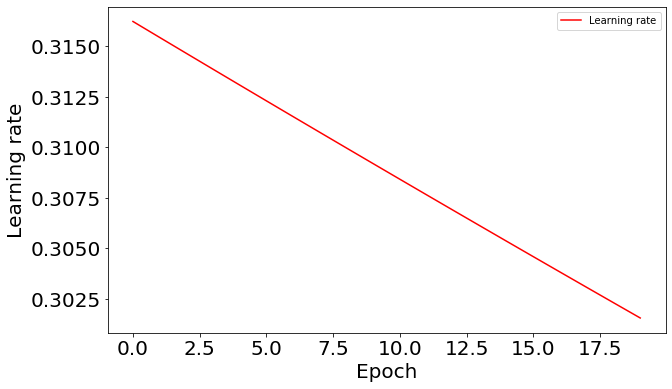

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_model_hist.history['lr']), 'r', label='Learning rate')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Learning rate', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

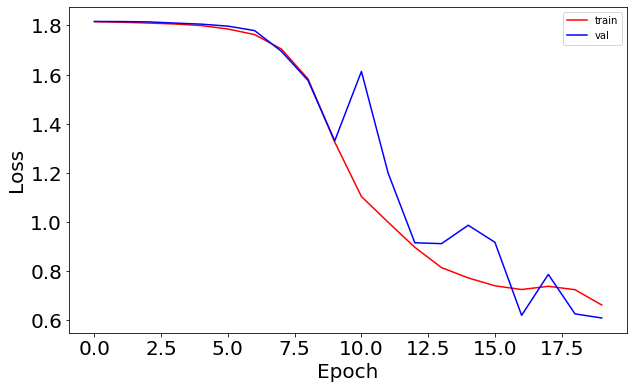

In [61]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_model_hist.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_model_hist.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
# how loss decreses with decreasing learning rate

In [62]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    epochs = 20
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    sgd = SGD(lr=learning_rate, decay=decay_rate, nesterov=False)
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(128, (3, 3), input_shape=X_train.shape[1:], activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    
    model.compile(optimizer=sgd,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [63]:
#from create_model import create_model
from sklearn.model_selection import GridSearchCV
new_model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=new_model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

## Final Predict

#### Using the best parameters

In [64]:
epochs = 20
learning_rate = 0.001

from tensorflow.keras.optimizers import Adam

adam = Adam(lr=learning_rate)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(128, (3, 3), input_shape=X_train.shape[1:], activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))

model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epochs, batch_size = 10)

Train on 228 samples
Epoch 1/20
228/228 [==============================] - 2s 8ms/sample - loss: 3.2520 - acc: 0.0921
Epoch 2/20
228/228 [==============================] - 1s 7ms/sample - loss: 2.3222 - acc: 0.3421
Epoch 3/20
228/228 [==============================] - 2s 7ms/sample - loss: 0.9669 - acc: 0.7193
Epoch 4/20
228/228 [==============================] - 2s 7ms/sample - loss: 0.6383 - acc: 0.7675
Epoch 5/20
228/228 [==============================] - 2s 8ms/sample - loss: 0.5443 - acc: 0.7632
Epoch 6/20
228/228 [==============================] - 2s 8ms/sample - loss: 0.4870 - acc: 0.8026
Epoch 7/20
228/228 [==============================] - 2s 7ms/sample - loss: 0.4783 - acc: 0.7588
Epoch 8/20
228/228 [==============================] - 2s 7ms/sample - loss: 0.3679 - acc: 0.8377 0s - loss: 0.400
Epoch 9/20
228/228 [==============================] - 2s 7ms/sample - loss: 0.4134 - acc: 0.7939
Epoch 10/20
228/228 [==============================] - 1s 6ms/sample - loss: 0.3644 - acc

In [65]:
y_pred = model.predict_classes(test)

In [66]:
target = []
for i in range(0, len(test_target)):
    target.append(list(letter_map.keys())[list(letter_map.values()).index(test_target[i])])

In [67]:
prediction = []
for i in range(0, len(y_pred)):
    prediction.append(list(letter_map.keys())[list(letter_map.values()).index(y_pred[i])])

In [68]:
print(target)
print('')
print(prediction)

['Η', 'Ο', 'Μ', 'Α', 'Δ', 'Α', 'Π', 'Α', 'Ι', 'Χ', 'Ν', 'Ι', 'Ζ', 'Ε', 'Ι', 'Τ', 'Ο', 'Π', 'Ρ', 'Ω', 'Τ', 'Ο', 'Π', 'Α', 'Ι', 'Χ', 'Ν', 'Ι', 'Δ', 'Ι', 'Ο', 'Μ', 'Π', 'Α', 'Σ', 'Κ', 'Ε', 'Λ', 'Τ', 'Ο', 'Υ', 'Τ', 'Η', 'Σ', 'Ν', 'Ε', 'Α', 'Σ', 'Ε', 'Π', 'Ο', 'Χ', 'Η', 'Σ', 'Π', 'Ι', 'Σ', 'Ω', 'Α', 'Υ', 'Τ', 'Ο', 'Ε', 'Ι', 'Ν', 'Α', 'Ι', 'Τ', 'Ο', 'Π', 'Ε', 'Ρ', 'Ι', 'Σ', 'Σ', 'Ο', 'Τ', 'Ε', 'Ρ', 'Ο', 'Γ', 'Ι', 'Α', 'Τ', 'Ο', 'Π', 'Ε', 'Ρ', 'Ι', 'Σ', 'Σ', 'Ο', 'Τ', 'Ε', 'Ρ', 'Ο', 'Τ', 'Ο', 'Υ', 'Χ', 'Α', 'Ν', 'Ο', 'Υ', 'Ν', 'Ε', 'Ν', 'Α', 'Ν', 'Α', 'Ρ', 'Ι', 'Σ', 'Τ', 'Η', 'Ο', 'Μ', 'Α', 'Δ', 'Α', 'Π', 'Ο', 'Υ', 'Ε', 'Χ', 'Ε', 'Ι', 'Κ', 'Ο', 'Ν', 'Τ', 'Α', 'Σ', 'Τ', 'Ο', 'Π', 'Ρ', 'Ω', 'Τ', 'Ο', 'Τ', 'Υ', 'Π', 'Ο', 'Τ', 'Η', 'Ν', 'Ο', 'Μ', 'Α', 'Δ', 'Α', 'Π', 'Ο', 'Υ', 'Ε', 'Ι', 'Ν', 'Α', 'Ι', 'Δ', 'Υ', 'Ν', 'Α', 'Τ', 'Ο', 'Π', 'Α', 'Ι', 'Χ', 'Ν', 'Ι', 'Δ', 'Ι', 'Τ', 'Ο', 'Π', 'Α', 'Ι', 'Χ', 'Ν', 'Ι', 'Δ', 'Ι', 'Η', 'Ο', 'Μ', 'Α', 'Δ', 'Α', 'Π', 'Ε', 'Ρ', 'Ι', 'Σ', 'Σ', 'Ο', 'Τ', 'Ε', 'Ρ',